In [26]:
import pandas as pd
import numpy as np

# Load the data into a pandas dataframe
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Data Preprocessing

We will select the relevant variables from the data and preprocess it by converting categorical variables into numerical variables and handling missing values.




In [27]:
# Select relevant variables
data = data[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

# Convert Sex to numerical values
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

# Convert Embarked to numerical values and fill missing values
data["Embarked"] = data["Embarked"].fillna("S")
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Fill missing values in Age with median
data["Age"] = data["Age"].fillna(data["Age"].median())

# Split the data into features and target
X = data.drop("Survived", axis=1)
y = data["Survived"]

Step 3: Split the Data

We will split the preprocessed data into a training, development, and test set.

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Step 4: Train a Decision Tree and plot it

We will train a decision tree using the training data and make a plot of it.  

In [29]:
#train a decision tree classifier with no restriction on depth
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

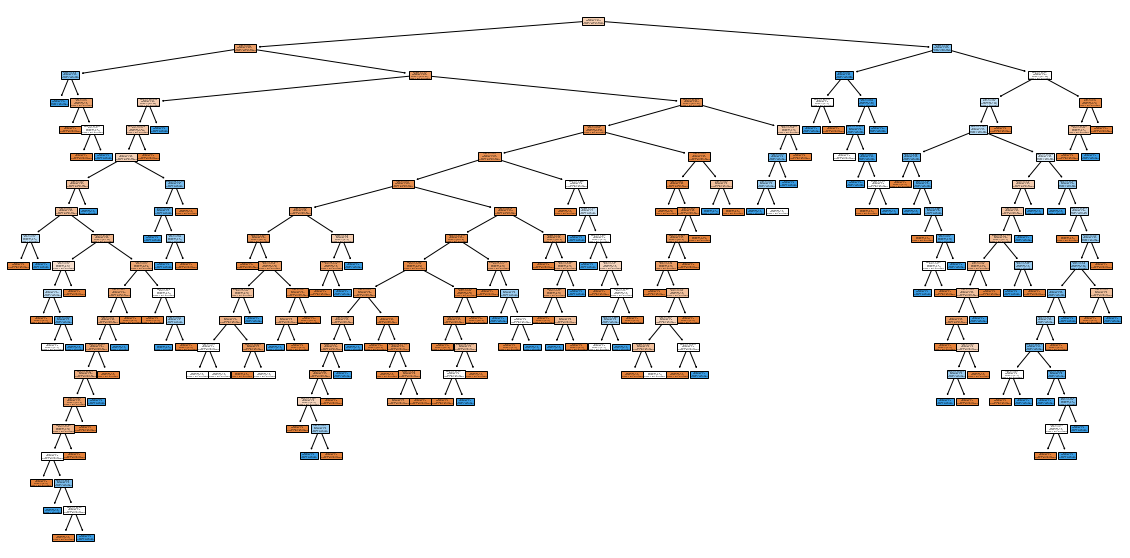

In [30]:
#plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(clf, ax=ax, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

Step 5: Compute Accuracy

We will compute the accuracy of the model on the development set.

In [31]:
from sklearn.metrics import accuracy_score

# Predict on the development set
y_dev_pred = clf.predict(X_dev)

# Compute the accuracy of the model on the development set
accuracy = accuracy_score(y_dev, y_dev_pred)
print("Accuracy on Development Set:", accuracy)

Accuracy on Development Set: 0.7808988764044944


Step 6: Tree Pruning

We will try building our model with different values of the max_depth parameter [2-10]. At each step, we will create a plot of the tree and store the accuracies on both the training and development data.
This will produce a plot of the tree at each value of the max_depth parameter and store the accuracies on both the training and development data.


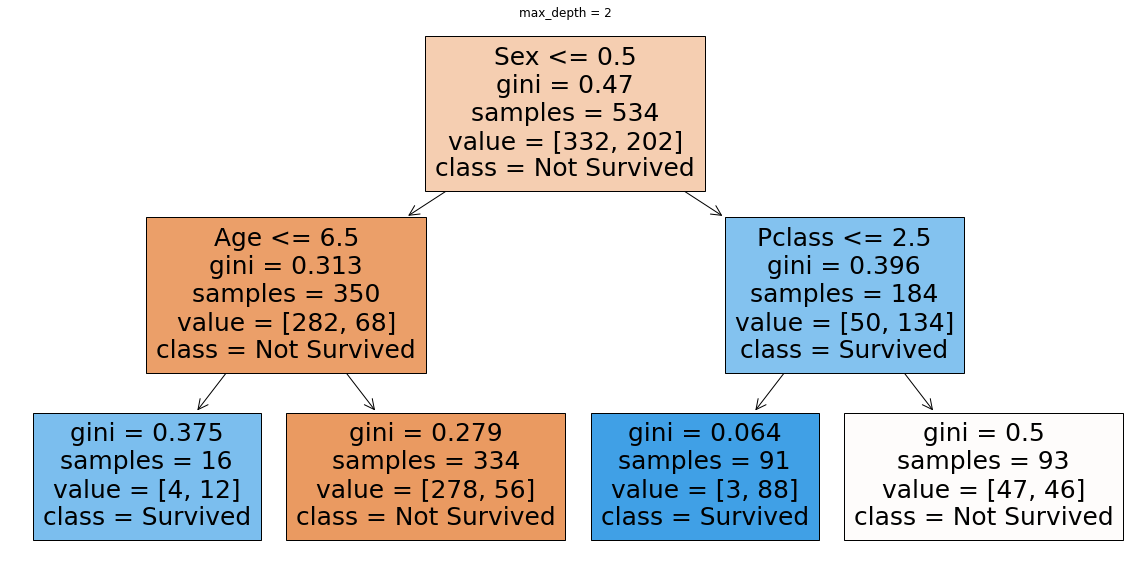

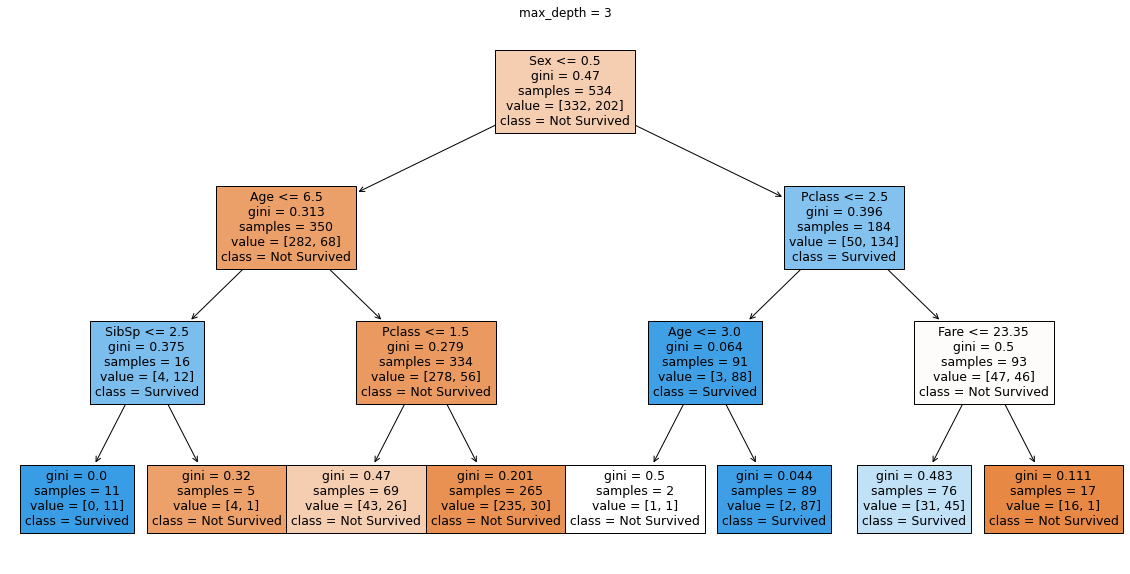

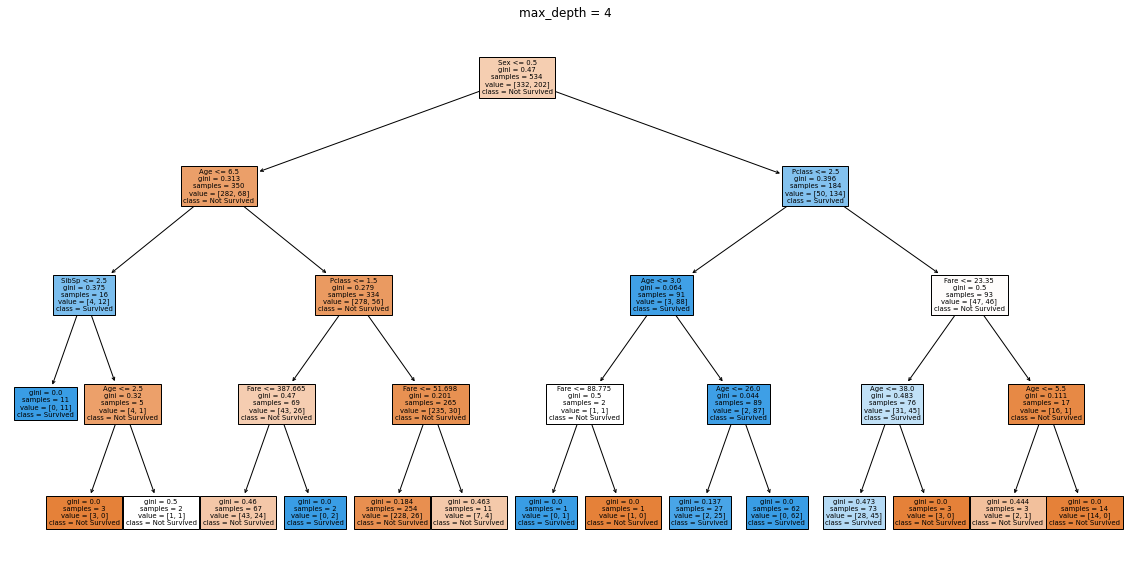

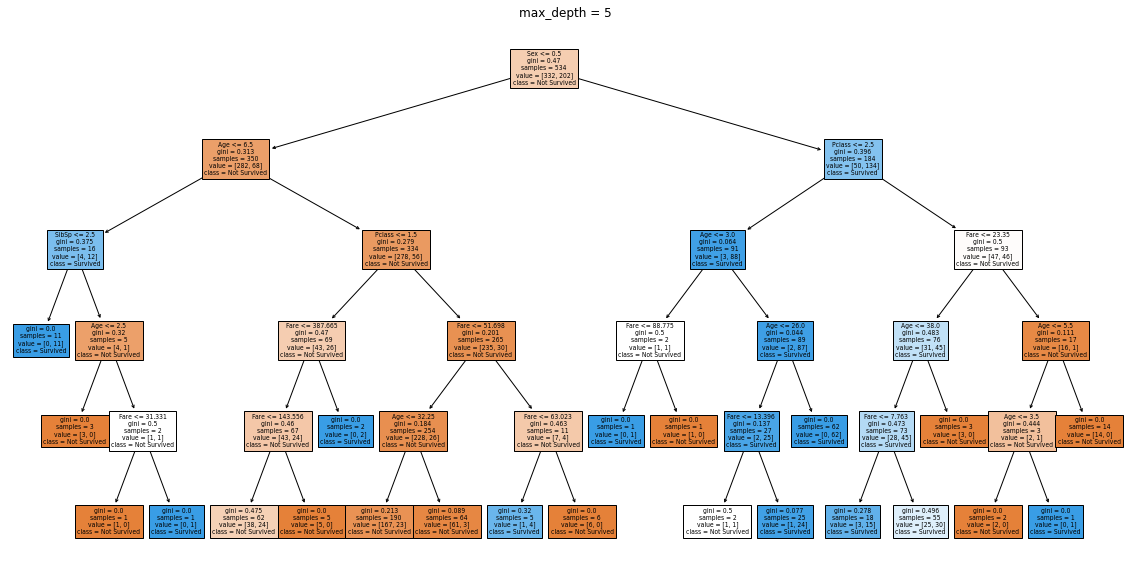

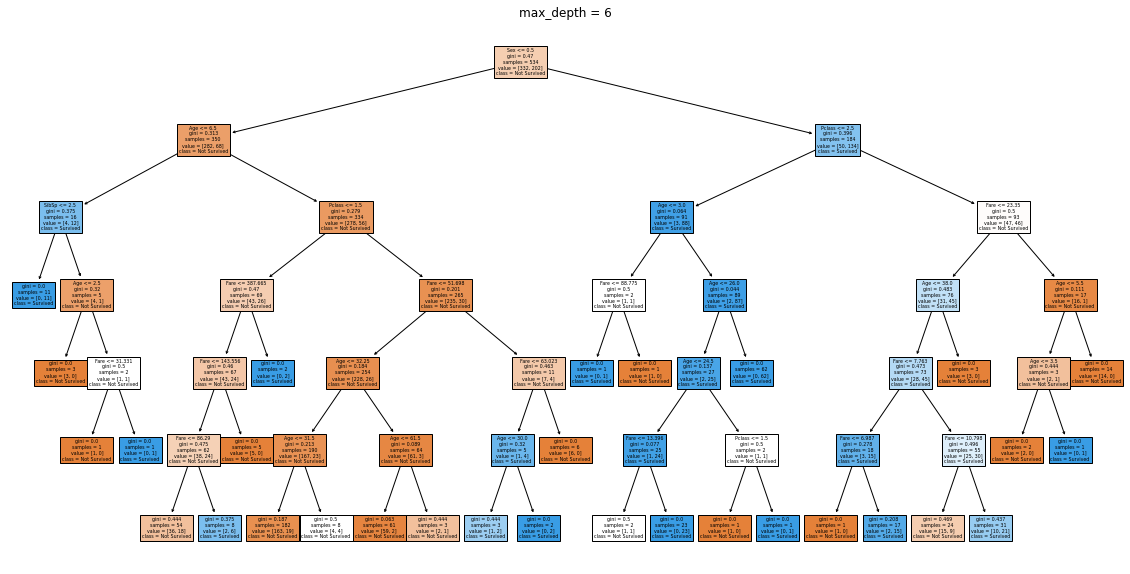

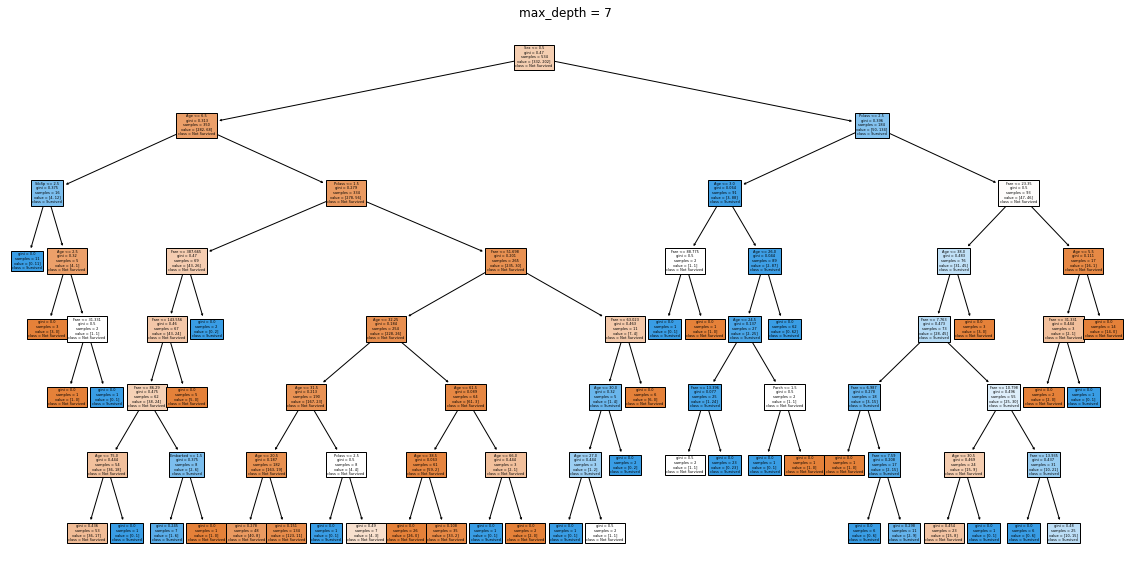

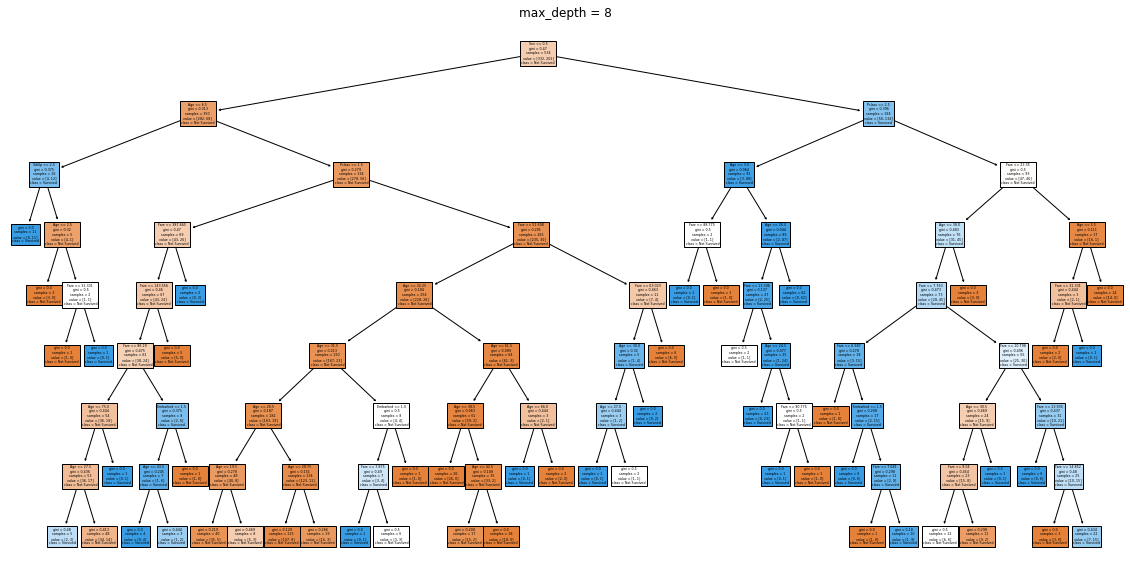

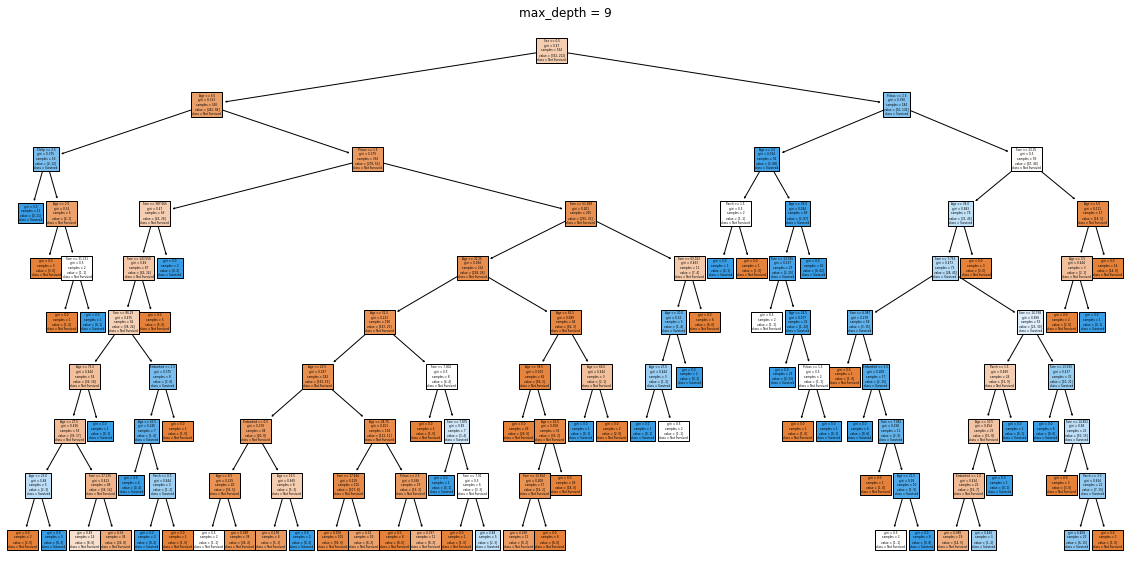

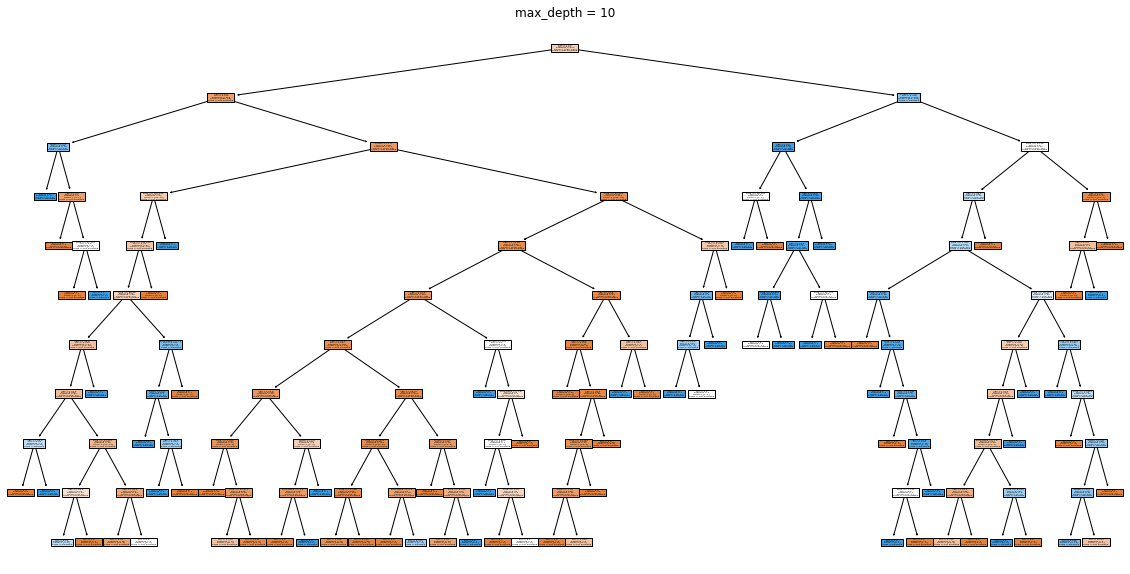

In [32]:
# Define the range of max_depth values to try
max_depths = np.arange(2, 11)

# Initialize lists to store training and development accuracies
train_accs = []
dev_accs = []

for max_depth in max_depths:
    # Train a decision tree classifier with the specified max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = clf.predict(X_train)
    
    # Compute the accuracy of the model on the training set
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predict on the development set
    y_dev_pred = clf.predict(X_dev)
    
    # Compute the accuracy of the model on the development set
    dev_acc = accuracy_score(y_dev, y_dev_pred)
    
    # Append the accuracies to the lists
    train_accs.append(train_acc)
    dev_accs.append(dev_acc)
    
    # Plot the decision tree
    fig, ax = plt.subplots(figsize=(20, 10))
    plot_tree(clf, ax=ax, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
    plt.title("max_depth = {}".format(max_depth))
    plt.show()

Step 7: Plot Accuracy

We will plot a line of the training accuracies and another of the development accuracies in the same graph. This will help us visualize the accuracy of our model at different values of the max_depth parameter.
This will produce a plot of the training and development accuracies as a function of the max_depth parameter.

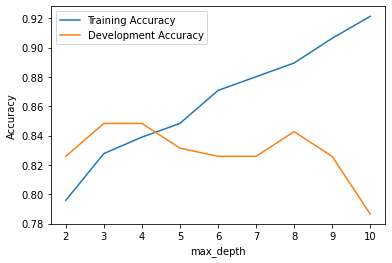

In [33]:
# Plot the training and development accuracies as a function of max_depth
plt.plot(max_depths, train_accs, label="Training Accuracy")
plt.plot(max_depths, dev_accs, label="Development Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Step 8: Pick Optimum Value

We will pick an optimum value for the max_depth parameter and train our final decision tree using this parameter.

In [34]:
# Choose the optimum value of max_depth
optimum_max_depth = max_depths[np.argmax(dev_accs)]

# Train a decision tree classifier with the optimum max_depth
clf = DecisionTreeClassifier(max_depth=optimum_max_depth, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)